In [15]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/match_data.csv')
df.head()

,Date,Team1,Team2,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,28/03/2024,spirit,faze,0,4,79.2,1,72.4,1.03,0.63,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,28/03/2024,spirit,natus_vincere,1,4,79.2,2,77.3,1.03,0.63,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,28/03/2024,spirit,imperial,1,4,79.2,18,72.0,1.03,0.63,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,28/03/2024,spirit,cloud9,1,4,79.2,7,63.0,1.03,0.63,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,28/03/2024,spirit,metizport,1,4,79.2,30,62.0,1.03,0.63,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [4]:
df['Score'].value_counts()

Score
1    1296
0    1259
Name: count, dtype: int64

In [5]:
df = df.drop(['Team1', 'Team2', 'Date'], axis=1)
df.head()

,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,1,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,1,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,1,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [6]:
X = df.drop(['Score'], axis=1)
X.head()

,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,Team1_Player2_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,0.74,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [7]:
y = df['Score']

In [11]:
class TabularModel(nn.Module):
    def __init__(self, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        
        for i in layers:
            layerlist.append(nn.Linear(n_cont, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_cont = i
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cont):
        x = self.bn_cont(x_cont)
        x = self.layers(x)
        return x

In [30]:
torch.manual_seed(33)
model = TabularModel(n_cont=X.shape[1], out_sz=1, layers=[200,100], p=0.4)

In [31]:
model

TabularModel(
  (bn_cont): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=44, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train_np = X_train.to_numpy(dtype=np.float32)
y_train_np = y_train.to_numpy(dtype=np.int64)  

X_test_np = X_test.to_numpy(dtype=np.float32)
y_test_np = y_test.to_numpy(dtype=np.int64)

X_train_t = torch.from_numpy(X_train_np)
y_train_t = torch.from_numpy(y_train_np)

X_test_t = torch.from_numpy(X_test_np)
y_test_t = torch.from_numpy(y_test_np)

In [37]:
import time
start_time = time.time()

epochs = 2000
losses = []

from torch.utils.data import DataLoader, TensorDataset

batch_size = 64
train_data = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    if epoch % 25 == 0:
        print(f'epoch: {epoch:3}  loss: {loss.item():10.8f}')

    # optimizer.zero_grad()
    # loss.backward()
    # optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}')
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

tensor([[-0.1945],
        [-0.7610],
        [-0.5204],
        [ 0.3746],
        [-0.2970]], grad_fn=<SliceBackward0>)


IndexError: Target 1 is out of bounds.

Text(0.5, 0, 'epoch')

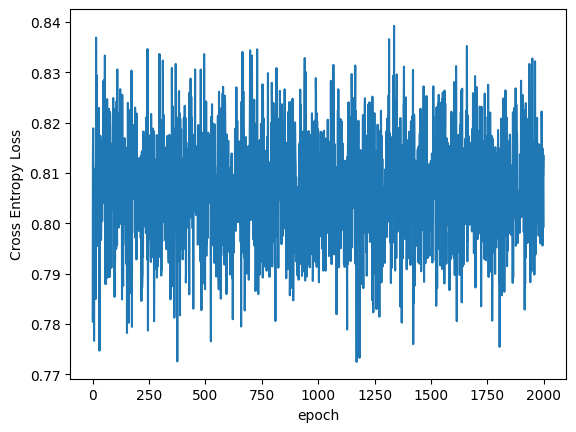

In [25]:
detached_losses = [loss.detach().numpy() for loss in losses]
plt.plot(range(epochs), detached_losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')